In [26]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
with open('Dataset/avoplotto.pkl', 'rb') as f:
    avocados = pickle.load(f)

avocados

,date,type,year,avg_price,size,nb_sold
0,2015-12-27,conventional,2015,0.95,small,9626901.09
1,2015-12-20,conventional,2015,0.98,small,8710021.76
2,2015-12-13,conventional,2015,0.93,small,9855053.66
3,2015-12-06,conventional,2015,0.89,small,9405464.36
4,2015-11-29,conventional,2015,0.99,small,8094803.56
...,...,...,...,...,...,...
1009,2018-02-04,organic,2018,1.53,extra_large,1703.52
1010,2018-01-28,organic,2018,1.61,extra_large,1270.61
1011,2018-01-21,organic,2018,1.63,extra_large,1490.02
1012,2018-01-14,organic,2018,1.59,extra_large,1580.01


### Visualizing Data

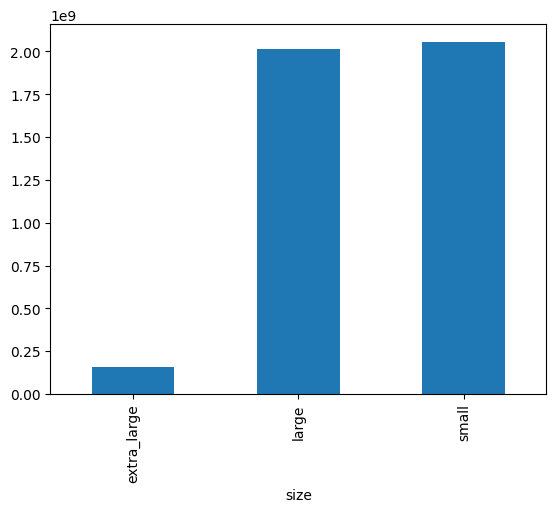

In [5]:
# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby("size")["nb_sold"].sum()
nb_sold_by_size.plot(kind='bar')
plt.show()

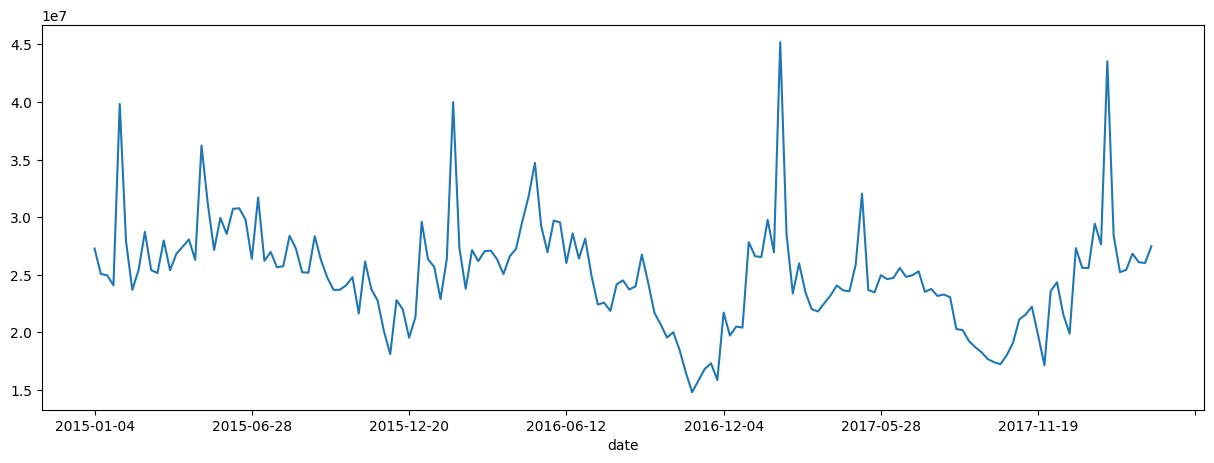

In [13]:
fig = plt.figure(figsize=(15,5))
# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby('date')['nb_sold'].sum()
nb_sold_by_date.plot(kind = "line")
plt.show()

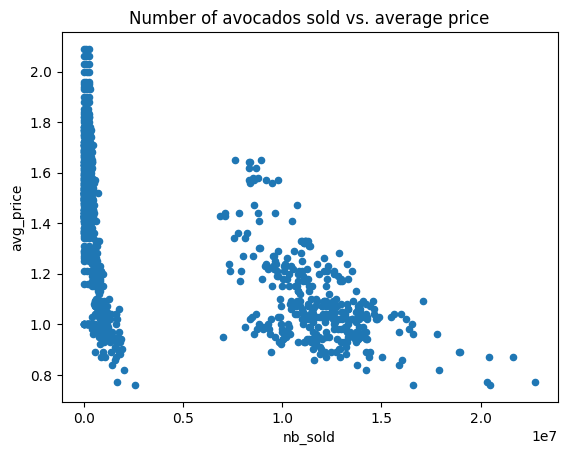

In [16]:
# Scatter plot of avg_price vs. nb_sold with title
avocados.plot(x='nb_sold', y='avg_price', kind='scatter',title ="Number of avocados sold vs. average price")
plt.show()

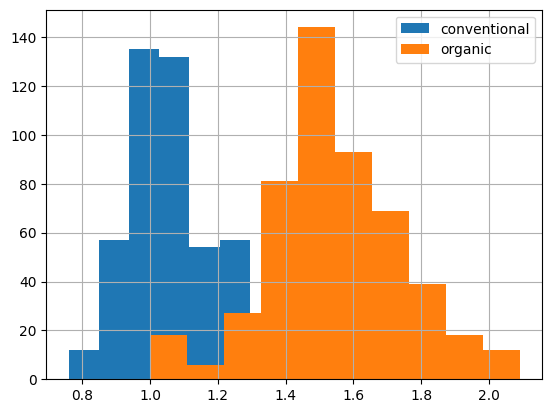

In [17]:
avocados[avocados['type']=='conventional']['avg_price'].hist()
avocados[avocados['type']=='organic']['avg_price'].hist()
plt.legend(['conventional','organic'])
plt.show()

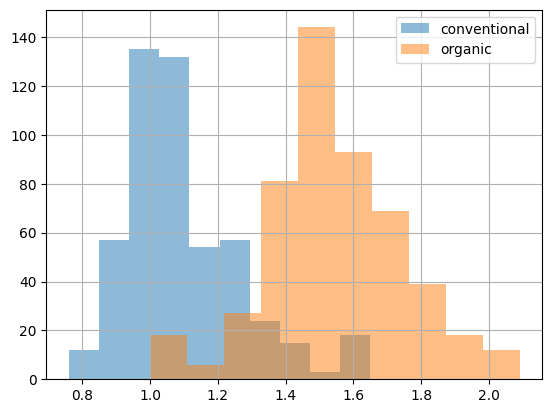

In [18]:
# Modify histogram transparency to 0.5 
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5)
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5)
plt.legend(["conventional", "organic"])
plt.show()

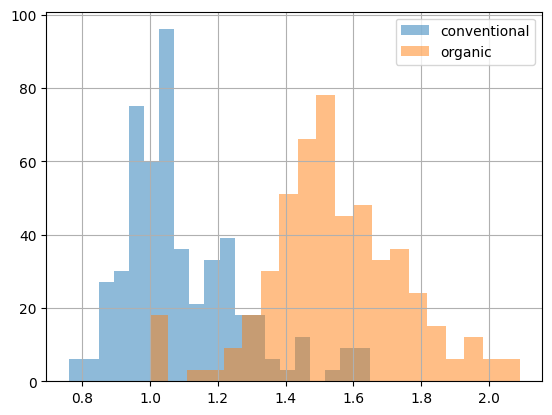

In [19]:
# Modify bins to 20
avocados[avocados["type"] == "conventional"]["avg_price"].hist(alpha=0.5, bins=20)
avocados[avocados["type"] == "organic"]["avg_price"].hist(alpha=0.5, bins=20)
plt.legend(["conventional", "organic"])
plt.show()

### Missing Values

In [32]:
avocados_2016 = pd.read_csv("Dataset/avocados_2016.csv", index_col=0)
avocados_2016.head()

,avg_price,total_sold,small_sold,large_sold,xl_sold,total_bags_sold,small_bags_sold,large_bags_sold,xl_bags_sold
date,,,,,,,,,
12/25/2016,1.00,30290000,9255000.0,10280000.0,542000.0,10210000,7710000,2417000,81101.22
12/18/2016,0.96,29580000,9394000.0,10340000.0,427900.0,9423000,6970000,2358000,94011.78
12/11/2016,0.98,30090000,9010000.0,NaN,403000.0,10710000,8149000,2490000,73342.82
12/4/2016,1.00,31620000,11040000.0,9909000.0,428000.0,10240000,7187000,2989000,65350.63
11/27/2016,1.21,22920000,7891000.0,7337000.0,NaN,7350000,5691000,1610000,48623.28


In [33]:
avocados_2016.isna().head()

,avg_price,total_sold,small_sold,large_sold,xl_sold,total_bags_sold,small_bags_sold,large_bags_sold,xl_bags_sold
date,,,,,,,,,
12/25/2016,False,False,False,False,False,False,False,False,False
12/18/2016,False,False,False,False,False,False,False,False,False
12/11/2016,False,False,False,True,False,False,False,False,False
12/4/2016,False,False,False,False,False,False,False,False,False
11/27/2016,False,False,False,False,True,False,False,False,False


In [34]:
avocados_2016.isna().any()

avg_price          False
total_sold         False
small_sold          True
large_sold          True
xl_sold             True
total_bags_sold    False
small_bags_sold    False
large_bags_sold    False
xl_bags_sold       False
dtype: bool

In [35]:
avocados_2016.isna().sum()

avg_price          0
total_sold         0
small_sold         6
large_sold         6
xl_sold            4
total_bags_sold    0
small_bags_sold    0
large_bags_sold    0
xl_bags_sold       0
dtype: int64

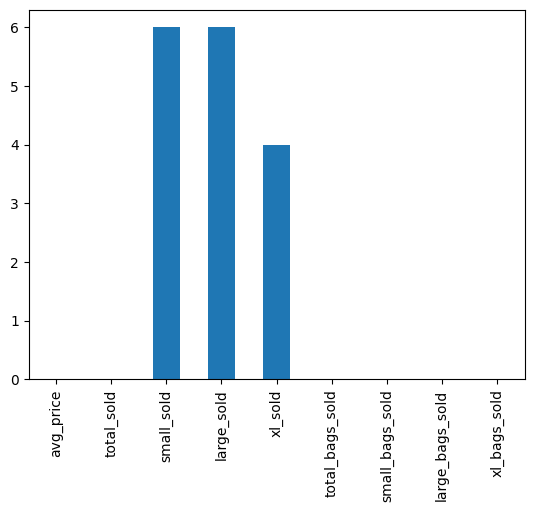

In [37]:
# Bar plot of missing values by variable
avocados_2016.isna().sum().plot(kind='bar')
plt.show()

In [38]:
# Remove rows with missing values
avocados_complete = avocados_2016.dropna()

# Check if any columns contain missing values
avocados_complete.isna().any()

avg_price          False
total_sold         False
small_sold         False
large_sold         False
xl_sold            False
total_bags_sold    False
small_bags_sold    False
large_bags_sold    False
xl_bags_sold       False
dtype: bool

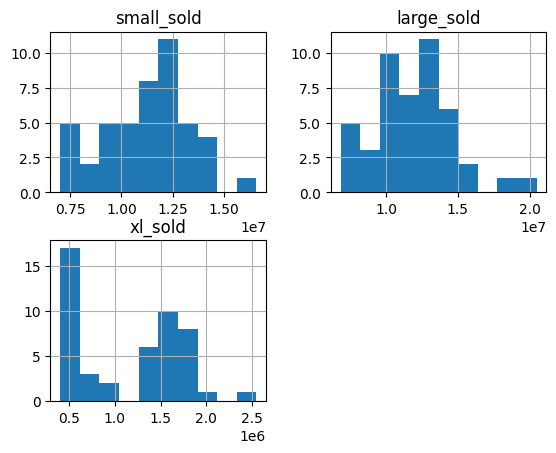

In [39]:
# List the columns with missing values
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]
avocados_2016[cols_with_missing].hist()
plt.show()

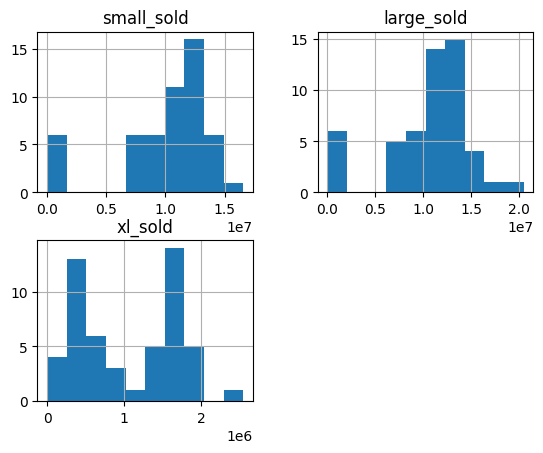

In [40]:
# Fill in missing values with 0
avocados_filled = avocados_2016.fillna(0)
avocados_filled[cols_with_missing].hist()
plt.show()